
--- Running Segmentation using KMEANS ---
Processing K=2...
Processing K=3...
Processing K=4...
Processing K=5...


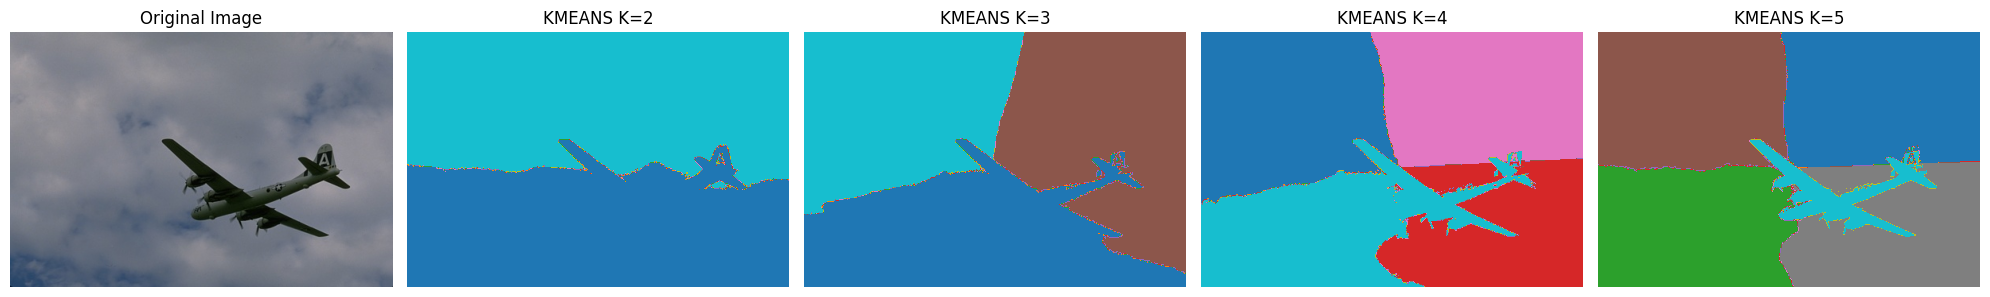


--- Running Segmentation using GMM ---
Processing K=2...
Processing K=3...
Processing K=4...
Processing K=5...


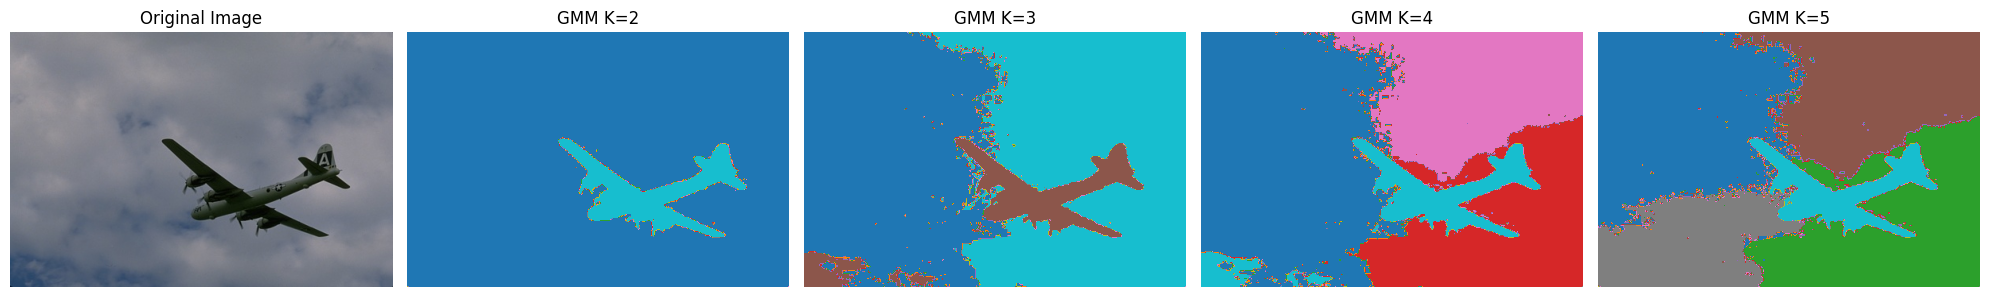


--- Running Segmentation using KMEANS ---
Processing K=2...
Processing K=3...
Processing K=4...
Processing K=5...


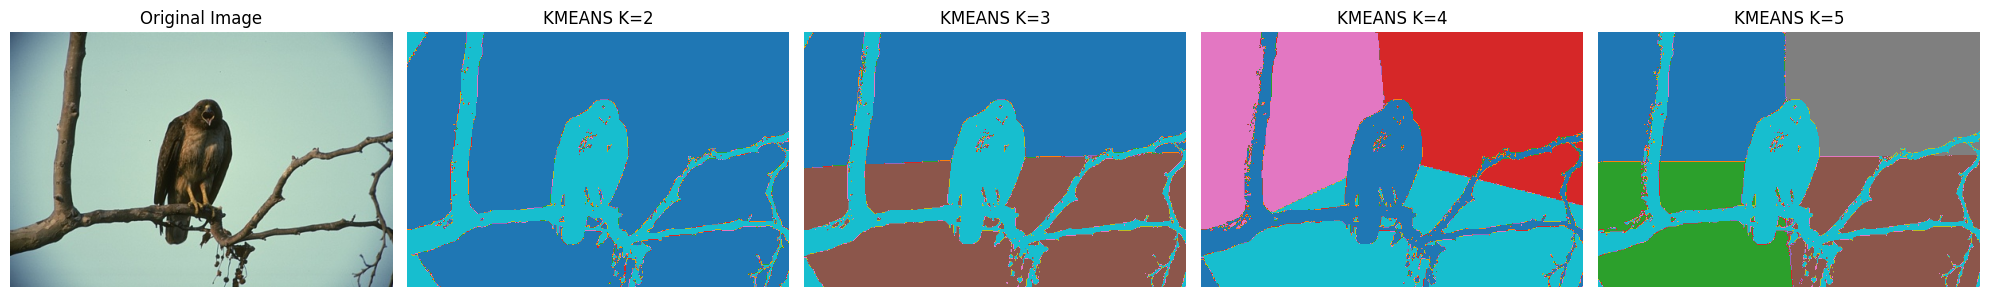


--- Running Segmentation using GMM ---
Processing K=2...
Processing K=3...
Processing K=4...
Processing K=5...


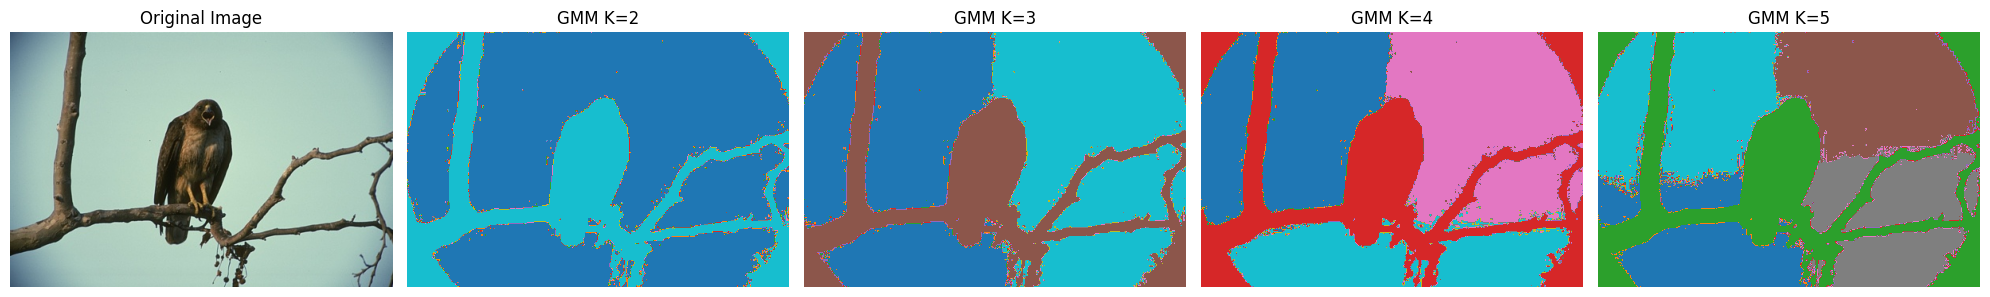

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

# ==========================================
# 1. Feature Extraction Helper
# ==========================================
def create_feature_matrix(image_path):
    """
    Reads an image and converts it into a (N_pixels, 5) feature matrix.
    Features: [Normalized_Row, Normalized_Col, Norm_R, Norm_G, Norm_B]
    """
    # Load Image (OpenCV loads as BGR, so convert to RGB)
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: Image not found at {image_path}")
        return None, None, None

    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    rows, cols, ch = img.shape
    
    # 1. Normalize Color (Scale 0-1)
    img_norm = img.astype(float) / 255.0
    
    # 2. Create Coordinate Grids (Scale 0-1)
    # np.meshgrid creates 2D arrays where each pixel has its X and Y coordinate
    x_grid, y_grid = np.meshgrid(np.linspace(0, 1, cols), np.linspace(0, 1, rows))
    
    # 3. Flatten Arrays
    # We flatten the 2D images into 1D arrays to stack them
    R = img_norm[:, :, 0].flatten()
    G = img_norm[:, :, 1].flatten()
    B = img_norm[:, :, 2].flatten()
    X = x_grid.flatten() # Column index
    Y = y_grid.flatten() # Row index
    
    # 4. Stack into Feature Matrix (N samples, 5 features)
    # [Y, X, R, G, B] matches the requirement: (row, col, red, green, blue)
    features = np.column_stack((Y, X, R, G, B))
    
    return features, img, (rows, cols)

# ==========================================
# 2. Segmentation Routine
# ==========================================
def run_segmentation(image_path, method='kmeans'):
    features, original_img, shape = create_feature_matrix(image_path)
    if features is None: return

    k_values = [2, 3, 4, 5]
    
    # Setup the plot figure
    fig, axes = plt.subplots(1, 5, figsize=(20, 5))
    
    # Show Original Image first
    axes[0].imshow(original_img)
    axes[0].set_title("Original Image")
    axes[0].axis('off')
    
    print(f"\n--- Running Segmentation using {method.upper()} ---")
    
    for i, K in enumerate(k_values):
        print(f"Processing K={K}...")
        
        if method == 'kmeans':
            # n_init=10 runs it 10 times and picks best result to avoid local minima
            model = KMeans(n_clusters=K, n_init=10, random_state=42)
            labels = model.fit_predict(features)
            
        elif method == 'gmm':
            # GMM uses Expectation-Maximization
            # We use a smaller covariance_type='diag' for speed if needed, 
            # but 'full' is more powerful for shaping clusters.
            model = GaussianMixture(n_components=K, random_state=42, covariance_type='full')
            labels = model.fit_predict(features)
        
        # Reshape the 1D label array back to the 2D image shape
        segmented_img = labels.reshape(shape)
        
        # Plotting
        # cmap='tab10' gives distinct colors for up to 10 classes
        # 'nipy_spectral' is another good option for high contrast
        axes[i+1].imshow(segmented_img, cmap='tab10')
        axes[i+1].set_title(f'{method.upper()} K={K}')
        axes[i+1].axis('off')
        
    plt.tight_layout()
    plt.show()

# ==========================================
# 3. Main Execution Block
# ==========================================
if __name__ == "__main__":
    target_image1 = 'image1.jpg'
    target_image2 = 'image2.jpg' 

    run_segmentation(target_image1, method='kmeans')
    
    run_segmentation(target_image1, method='gmm')
    
    run_segmentation(target_image2, method='kmeans')
    
    run_segmentation(target_image2, method='gmm')